# Trabajo Práctico
Apellido y Nombre del alumno:

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]

In [ ]:
df = pd.read_csv("entrenamiento.zip", index_col="id")
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
692975,Propiedad,2019-10-12,2019-10-16,2019-10-12,-58.421491,-34.605587,Argentina,Capital Federal,Almagro,NaN,...,1.0,67.0,63.0,200000.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Hermoso 3 ambientes clasico con cocina separad...,Departamento,Venta
410588,Propiedad,2019-10-13,2020-01-21,2019-10-13,-58.513908,-34.622557,Argentina,Capital Federal,Monte Castro,NaN,...,1.0,39.0,39.0,106000.0,USD,NaN,DEPARTAMENTO 2 AMBIENTES A ESTRENAR - MONTE CA...,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
526562,Propiedad,2020-03-28,2020-08-17,2020-03-28,-58.437803,-34.601369,Argentina,Capital Federal,Villa Crespo,NaN,...,1.0,50.0,48.0,129900.0,USD,NaN,Excelente 2 Amb en el corazón de Villa Crespo!,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
480579,Propiedad,2019-10-18,2019-11-02,2019-10-18,-58.428966,-34.604013,Argentina,Capital Federal,Almagro,NaN,...,1.0,37.0,33.0,92000.0,USD,NaN,Departamento de 2 ambientes en Venta en Almagr...,"Hermoso 2 ambientes con balcon al frente, 36m2...",Departamento,Venta
65937,Propiedad,2019-07-08,2019-09-14,2019-07-08,-58.497026,-34.644835,Argentina,Capital Federal,Mataderos,NaN,...,1.0,43.0,40.0,87000.0,USD,NaN,Dpto de 2 Amb con Balcón,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento,Venta


## 1.1. Análisis exploratorio de datos

In [ ]:
# Cantidad de filas y columnas
df.shape

(40959, 24)

In [ ]:
# Visualizar los últimos registros
df.tail()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
134436,Propiedad,2020-04-18,2020-05-03,2020-04-18,-58.459978,-34.606996,Argentina,Capital Federal,Caballito,NaN,...,1.0,46.0,42.0,96000.0,USD,NaN,Departamento de 2 ambientes en Venta en Caball...,Excelente departamento de dos ambientes con mu...,Departamento,Venta
110481,Propiedad,2020-01-22,2020-07-18,2020-01-22,-58.422754,-34.573948,Argentina,Capital Federal,Palermo,NaN,...,3.0,122.0,137.0,460000.0,USD,NaN,PISO 4 AMB FTE 3 BCONES 2 BAÑOS DEP. COCHERA B...,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento,Venta
691605,Propiedad,2019-10-12,2019-10-22,2019-10-12,-58.417448,-34.636960,Argentina,Capital Federal,Boedo,NaN,...,1.0,43.0,43.0,90000.0,USD,NaN,Departamento de 2 ambientes en Venta en Boedo,Oportunidad!! Excelente departamento listo par...,Departamento,Venta
439854,Propiedad,2019-11-27,2020-01-21,2019-11-27,-58.498601,-34.628604,Argentina,Capital Federal,Villa Luro,NaN,...,1.0,35.0,33.0,79800.0,USD,NaN,Monoambiente en Velez Sarfield a estrenar,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta
230290,Propiedad,2020-06-18,2020-06-20,2020-06-18,-58.440873,-34.597760,Argentina,Capital Federal,Villa Crespo,NaN,...,2.0,71.0,58.0,263329.0,USD,NaN,Departamento de 3 ambientes en Venta en Villa ...,Casa Crespo es el primer edificio Premium que ...,Departamento,Venta


## Medidas Estadisticas

---

In [ ]:
# Media de todas las variables numéricas
df.mean(numeric_only=True)

lat                   -58.441666
lon                   -34.596298
l5                           NaN
l6                           NaN
rooms                   2.428477
bedrooms                1.796145
bathrooms               1.344146
surface_total          69.969213
surface_covered        64.342823
price              178883.226031
price_period                 NaN
dtype: float64

In [ ]:
# Mediana de todas las variables
df.median(numeric_only=True)

lat                   -58.433430
lon                   -34.598551
l5                           NaN
l6                           NaN
rooms                   2.000000
bedrooms                2.000000
bathrooms               1.000000
surface_total          58.000000
surface_covered        51.000000
price              145000.000000
price_period                 NaN
dtype: float64

In [ ]:
# Moda de todas las variables
df.mode(numeric_only=True)

,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period
0,-58.455819,-34.579326,NaN,NaN,2.0,1.0,1.0,40.0,35.0,115000.0,NaN


In [ ]:
# Varianza de todas las variables numericas
df.var(numeric_only=True)

lat                5.535940e-02
lon                2.014676e-02
l5                          NaN
l6                          NaN
rooms              1.199722e+00
bedrooms           7.192469e-01
bathrooms          4.222752e-01
surface_total      1.779696e+03
surface_covered    2.356938e+04
price              1.411073e+10
price_period                NaN
dtype: float64

In [ ]:
# MAD de las variables
df.mad

In [ ]:
# Valores que toma una columna
df["price"].unique()

array([200000., 106000., 129900., ..., 133151.,  95370., 157672.])

In [ ]:
df.std(numeric_only=True)

lat                     0.235286
lon                     0.141939
l5                           NaN
l6                           NaN
rooms                   1.095318
bedrooms                0.848084
bathrooms               0.649827
surface_total          42.186440
surface_covered       153.523216
price              118788.591359
price_period                 NaN
dtype: float64

In [ ]:
df.var(numeric_only=True)

lat                5.535940e-02
lon                2.014676e-02
l5                          NaN
l6                          NaN
rooms              1.199722e+00
bedrooms           7.192469e-01
bathrooms          4.222752e-01
surface_total      1.779696e+03
surface_covered    2.356938e+04
price              1.411073e+10
price_period                NaN
dtype: float64

## Frecuencias

---

In [ ]:
# Frecuencias para cada valor de la variable
df["price"].value_counts()

In [ ]:
# Frecuencias para cada valor de la variable
df["rooms"].value_counts()

In [ ]:
# Frecuencias para cada valor de la variable
df["bedrooms"].value_counts()

In [ ]:
# Frecuencias para cada valor de la variable
df["bathrooms"].value_counts()

In [ ]:
# Frecuencias para cada valor de la variable
df["surface_covered"].value_counts()

In [ ]:
# Frecuencias para cada valor de la variable
df["surface_total"].value_counts()

In [ ]:
# Frecuencias para cada valor de la variable
df["lat"].value_counts()

In [ ]:
# Frecuencias para cada valor de la variable
df["lon"].value_counts()

## Coeficiente de variación

---


In [ ]:
#Coeficiente de Variacion de la variable Surface total

df["surface_total"].std(ddof=1) / df["surface_total"].mean()*100

60.29286078420019

In [ ]:
#Coeficiente de Variacion de la variable rooms

df["rooms"].std(ddof=1) / df["rooms"].mean()*100

45.10309213653602

In [ ]:
#Coeficiente de Variacion de la variable rooms

df["surface_covered"].std(ddof=1) / df["surface_covered"].mean()*100

238.60192564439652

## Coeficiente de Correlacion

---

In [ ]:
df[["rooms","bedrooms", "price"]].corr()

,rooms,bedrooms,price
rooms,1.000000,0.932711,0.648230
bedrooms,0.932711,1.000000,0.626779
price,0.648230,0.626779,1.000000


In [ ]:
df[["rooms","bedrooms", "bathrooms", "surface_total","surface_covered"]].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
rooms,1.000000,0.932711,0.570899,0.725406,0.183238
bedrooms,0.932711,1.000000,0.589669,0.719588,0.178198
bathrooms,0.570899,0.589669,1.000000,0.686506,0.171675
surface_total,0.725406,0.719588,0.686506,1.000000,0.228605
surface_covered,0.183238,0.178198,0.171675,0.228605,1.000000


## Graficos



Boxplot

---



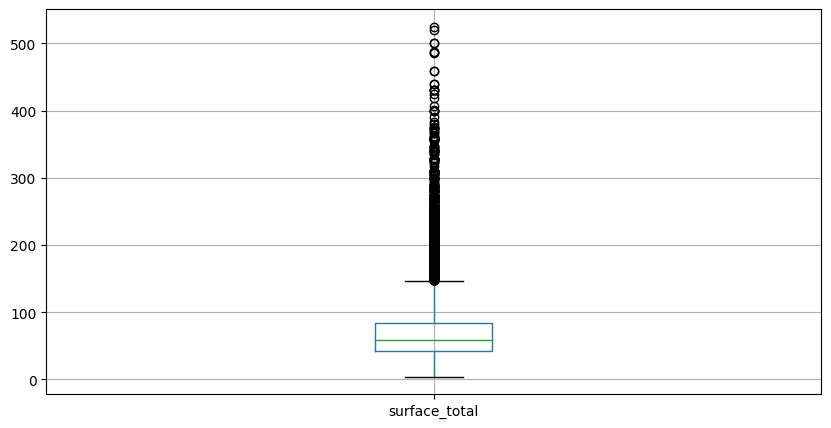

In [ ]:
ax = df.boxplot(column=["surface_total"], figsize=(10, 5))

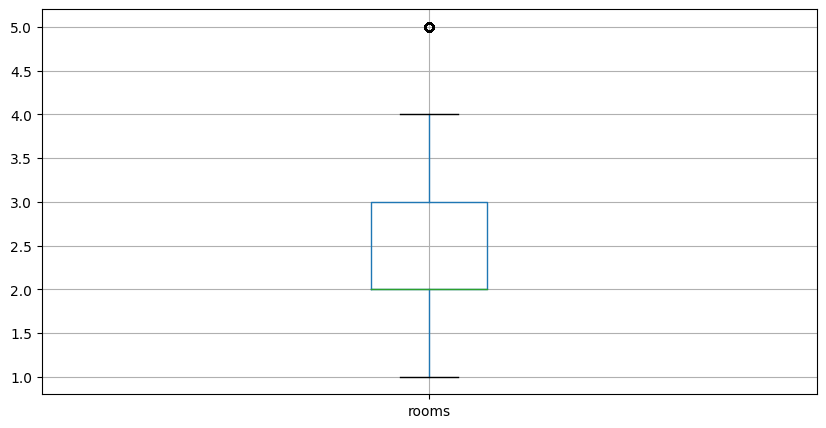

In [ ]:
ax = df.boxplot(column=["rooms"], figsize=(10, 5))

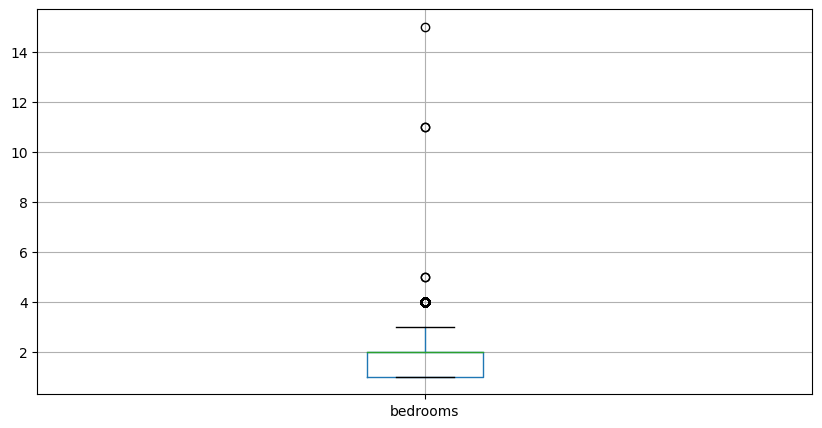

In [ ]:
ax = df.boxplot(column=["bedrooms"], figsize=(10, 5))

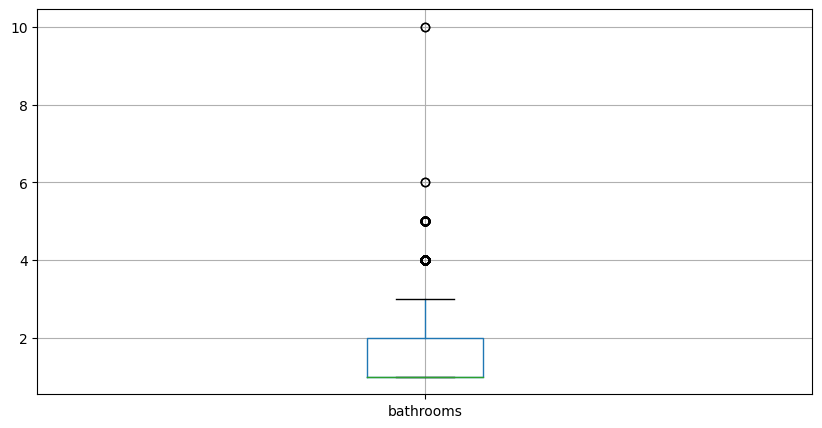

In [ ]:
ax = df.boxplot(column=["bathrooms"], figsize=(10, 5))

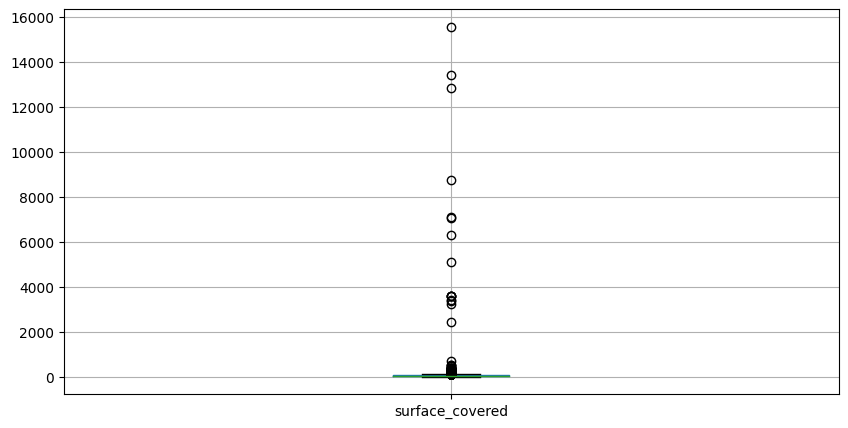

In [ ]:
ax = df.boxplot(column=["surface_covered"], figsize=(10, 5))

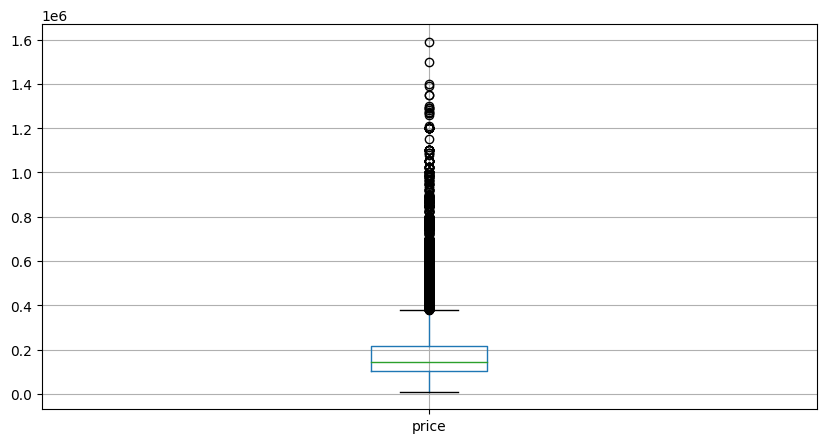

In [ ]:
ax = df.boxplot(column=["price"], figsize=(10, 5))

Histograma

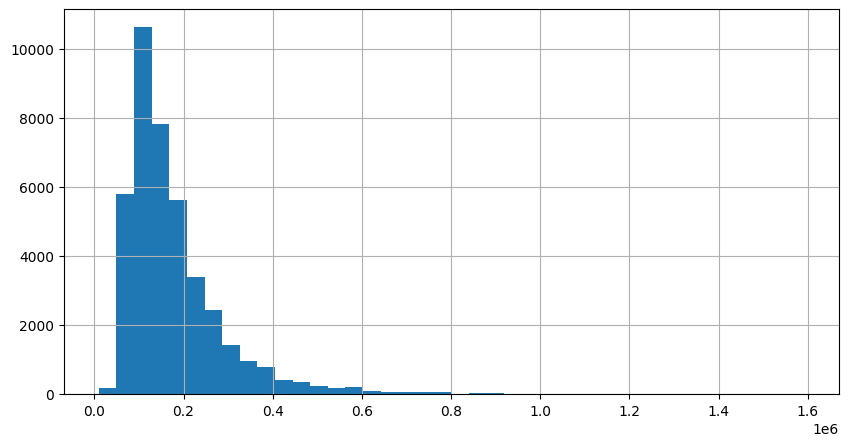

In [ ]:
ax = df["price"].hist(figsize=(10, 5), bins=40)

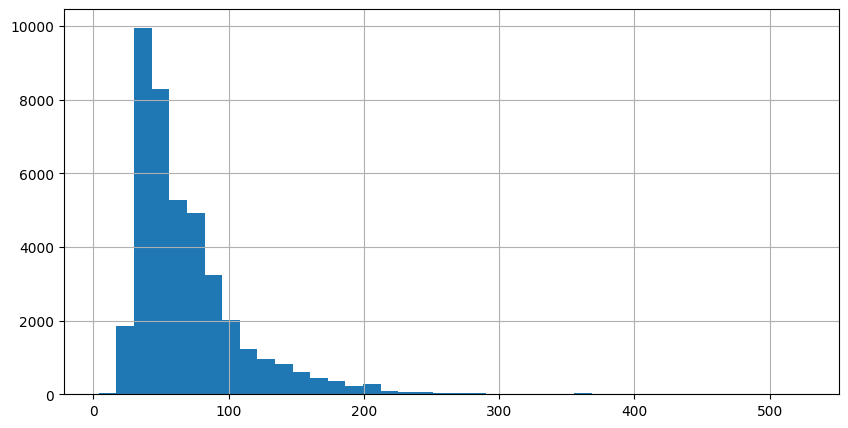

In [ ]:
ax = df["surface_total"].hist(figsize=(10, 5), bins=40)

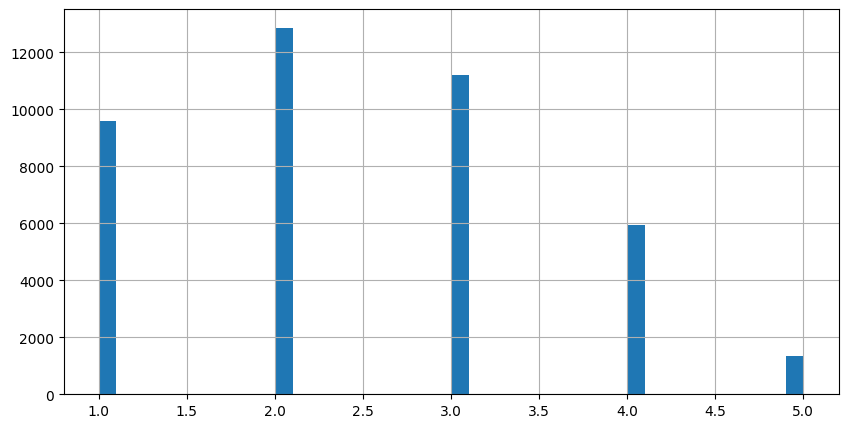

In [ ]:
ax = df["rooms"].hist(figsize=(10, 5), bins=40)

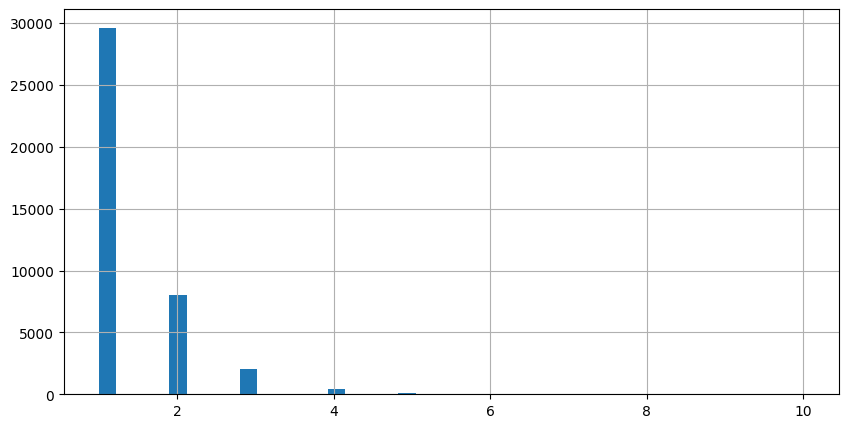

In [ ]:
ax = df["bathrooms"].hist(figsize=(10, 5), bins=40)

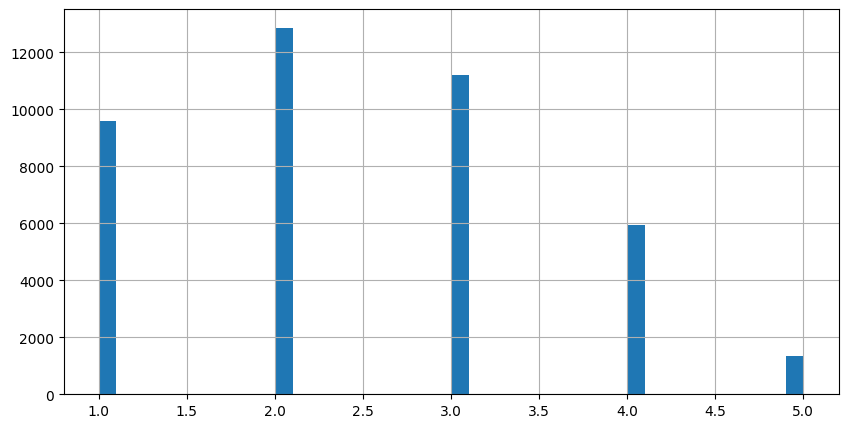

In [ ]:
ax = df["rooms"].hist(figsize=(10, 5), bins=40)

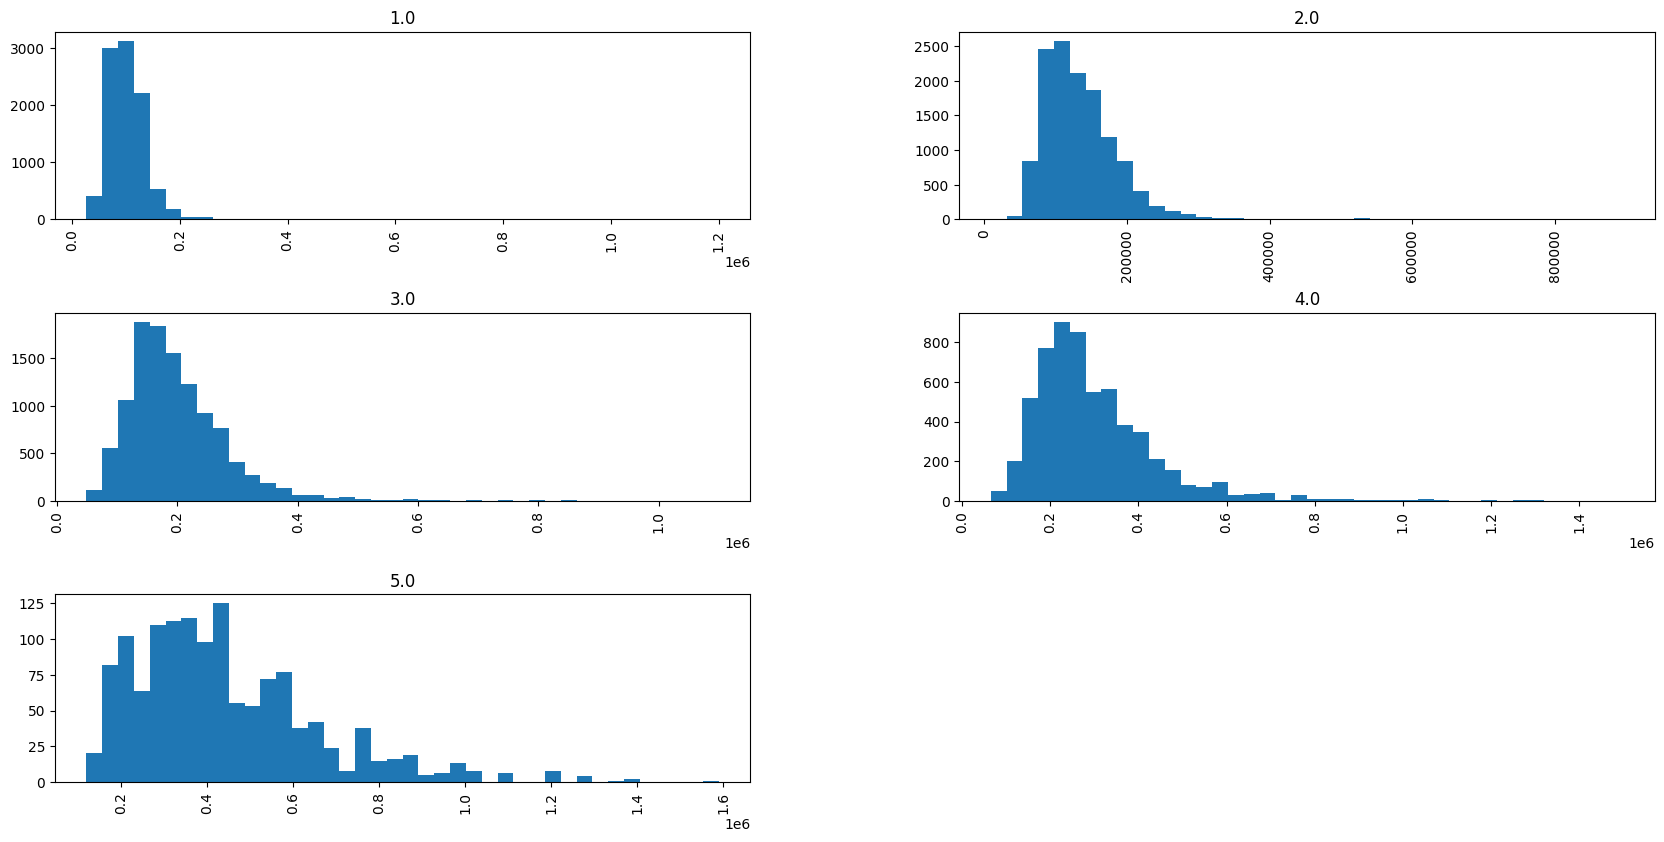

In [ ]:
ax = df.hist(column="price", by="rooms", bins=40, figsize=(20, 10))

# Test de Normalidad para analizar la distribucion de los datos


In [ ]:
from scipy import stats
from scipy.stats import shapiro
stats.shapiro(df["surface_total"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7937657833099365, pvalue=0.0)

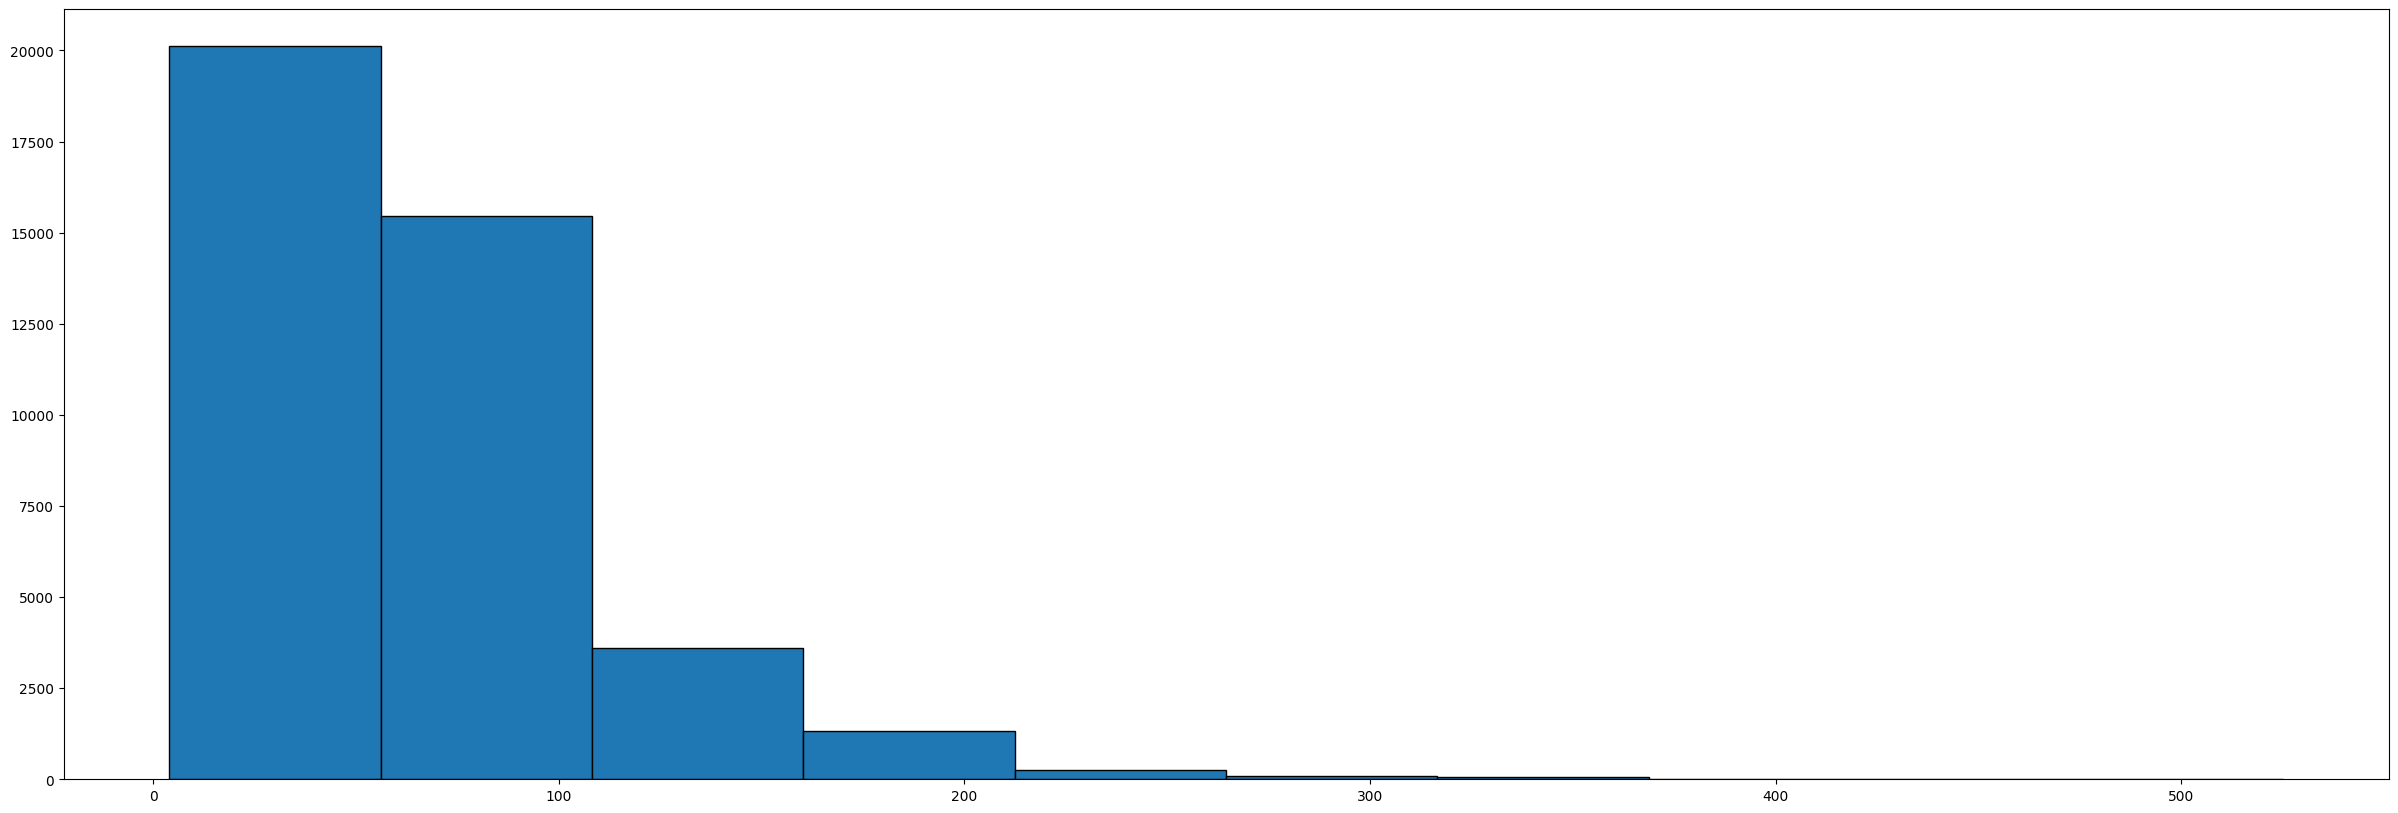

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["surface_total"],edgecolor='black')
plt.show()

## 1.2. Preparación y limpieza de datos

# Imputar valores atípicos con medidas descriptivas


In [ ]:
df.isna().sum().sort_values(ascending=False)

price_period       40959
l5                 40959
l6                 40959
l4                 39453
bedrooms            9260
lat                 2234
lon                 2234
bathrooms            665
surface_covered      285
l3                   258
ad_type                0
property_type          0
description            0
title                  0
currency               0
price                  0
rooms                  0
surface_total          0
start_date             0
l2                     0
l1                     0
created_on             0
end_date               0
operation_type         0
dtype: int64

<Axes: ylabel='id'>

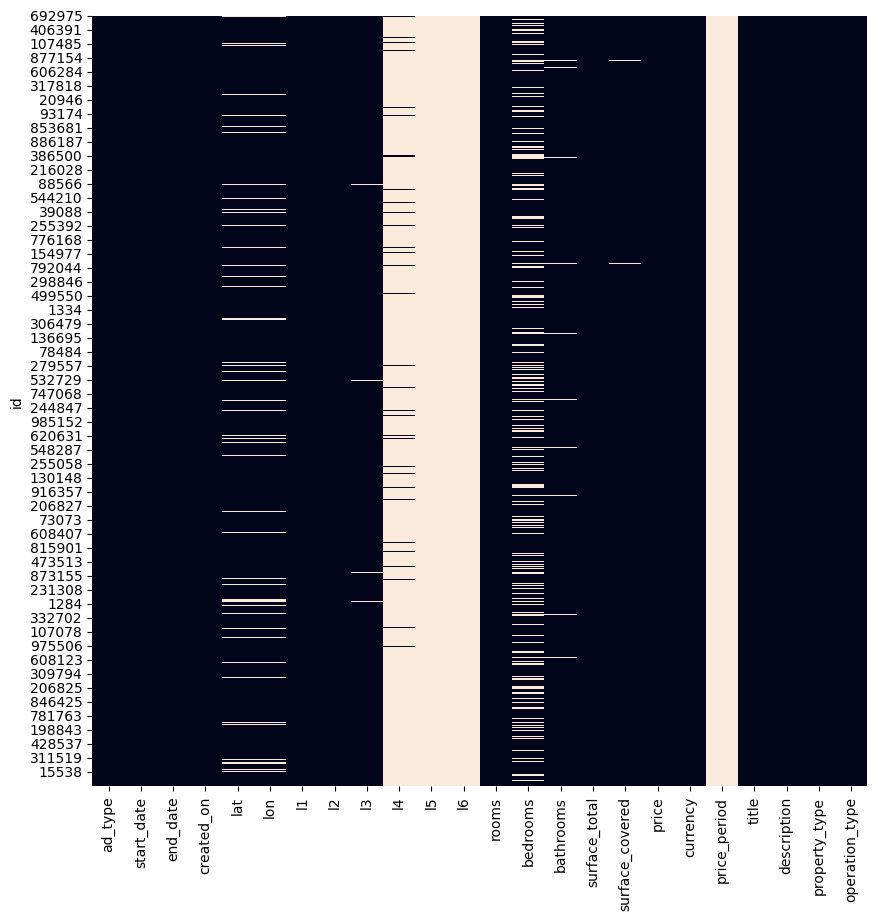

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.isnull(), cbar=False, ax=ax)

In [ ]:
#df solo con columnas numericas
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
692975,Propiedad,2019-10-12,2019-10-16,2019-10-12,-58.421491,-34.605587,Argentina,Capital Federal,Almagro,NaN,...,1.0,67.0,63.0,200000.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Hermoso 3 ambientes clasico con cocina separad...,Departamento,Venta
410588,Propiedad,2019-10-13,2020-01-21,2019-10-13,-58.513908,-34.622557,Argentina,Capital Federal,Monte Castro,NaN,...,1.0,39.0,39.0,106000.0,USD,NaN,DEPARTAMENTO 2 AMBIENTES A ESTRENAR - MONTE CA...,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
526562,Propiedad,2020-03-28,2020-08-17,2020-03-28,-58.437803,-34.601369,Argentina,Capital Federal,Villa Crespo,NaN,...,1.0,50.0,48.0,129900.0,USD,NaN,Excelente 2 Amb en el corazón de Villa Crespo!,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
480579,Propiedad,2019-10-18,2019-11-02,2019-10-18,-58.428966,-34.604013,Argentina,Capital Federal,Almagro,NaN,...,1.0,37.0,33.0,92000.0,USD,NaN,Departamento de 2 ambientes en Venta en Almagr...,"Hermoso 2 ambientes con balcon al frente, 36m2...",Departamento,Venta
65937,Propiedad,2019-07-08,2019-09-14,2019-07-08,-58.497026,-34.644835,Argentina,Capital Federal,Mataderos,NaN,...,1.0,43.0,40.0,87000.0,USD,NaN,Dpto de 2 Amb con Balcón,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento,Venta


In [ ]:
df.loc[df["rooms"]>4, 'rooms'] = df["rooms"].median()

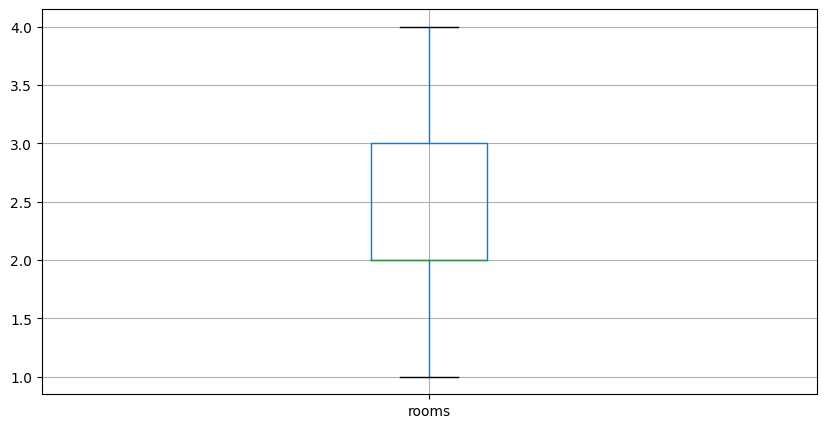

In [ ]:
ax = df.boxplot(column=["rooms"], figsize=(10, 5))

In [ ]:
df.loc[df["bathrooms"]>3, 'bathrooms'] = df["bathrooms"].median()

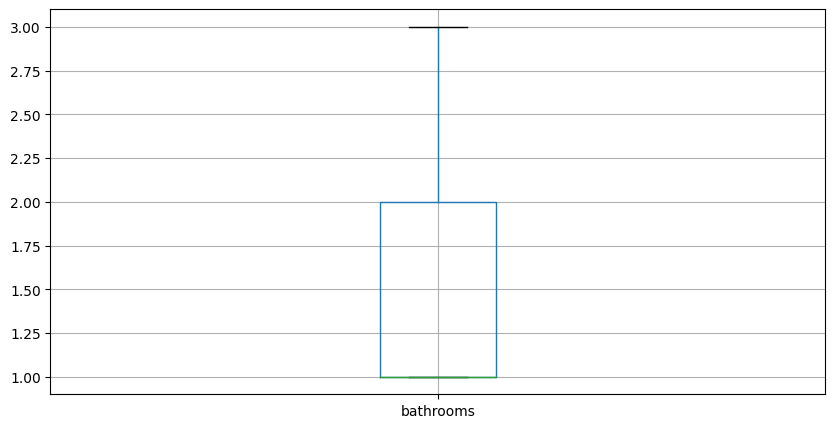

In [ ]:
ax = df.boxplot(column=["bathrooms"], figsize=(10, 5))

In [ ]:
df.loc[df["bedrooms"]>3, 'bedrooms'] = df["bedrooms"].median()

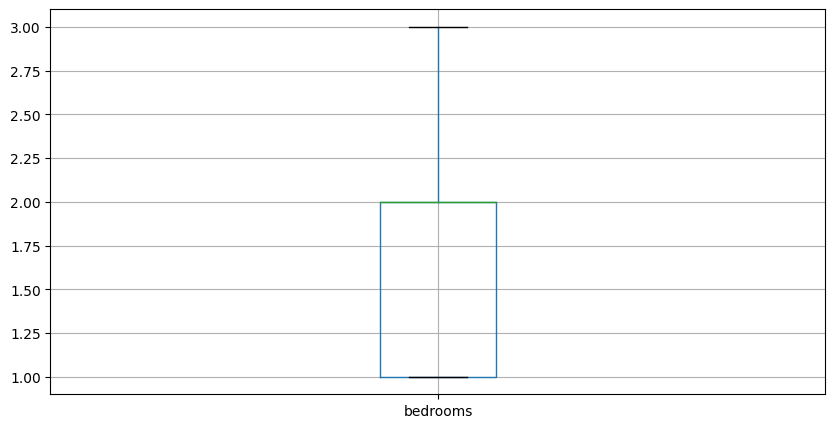

In [ ]:
ax = df.boxplot(column=["bedrooms"], figsize=(10, 5))

In [ ]:
df.loc[df["surface_total"]>110, 'surface_total'] = df["surface_total"].median()

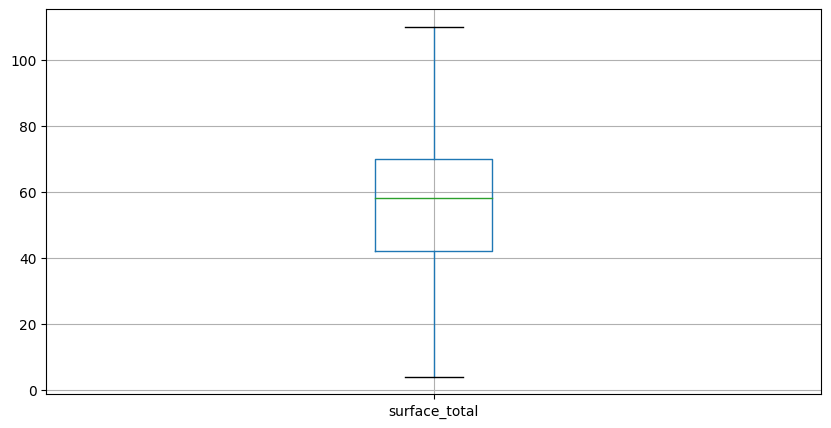

In [ ]:
ax = df.boxplot(column=["surface_total"], figsize=(10, 5))

In [ ]:
df.loc[df["rooms"]>4, 'rooms'] = df["rooms"].median()

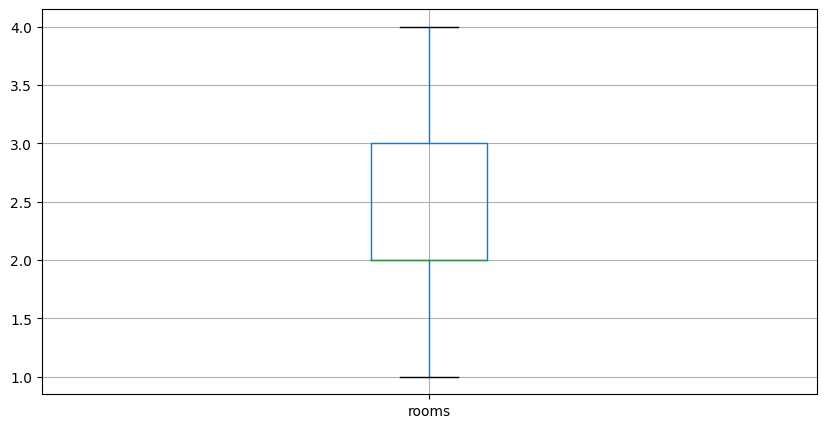

In [ ]:
ax = df.boxplot(column=["rooms"], figsize=(10, 5))

# Imputar valores faltantes del enlace con medidas descriptivas


In [ ]:
#Valores faltantes de las columnas con variables numericas: surfaced_ covered, bathrooms, bedrooms

df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
print("valores perdidos en bathroom: " +
      str(df['bathrooms'].isnull().sum()))


valores perdidos en bathroom: 0


In [ ]:
df['surface_covered'].fillna(df['surface_covered'].median(), inplace=True)
print("valores perdidos en surface_covered: " +
      str(df['surface_covered'].isnull().sum()))


valores perdidos en surface_covered: 0


In [ ]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
print("valores perdidos en bedrooms: " +
      str(df['bedrooms'].isnull().sum()))

valores perdidos en bedrooms: 0


In [ ]:
df = df.drop(columns=['l5'])


In [ ]:
df = df.drop(columns=['l6'])

In [ ]:
df = df.drop(columns=['price_period'])

In [ ]:
df.head

<bound method NDFrame.head of               lat        lon  rooms  bedrooms  bathrooms  surface_total  \
id                                                                        
692975 -58.421491 -34.605587    3.0       2.0        1.0           67.0   
410588 -58.513908 -34.622557    2.0       1.0        1.0           39.0   
526562 -58.437803 -34.601369    3.0       2.0        1.0           50.0   
480579 -58.428966 -34.604013    2.0       1.0        1.0           37.0   
65937  -58.497026 -34.644835    2.0       1.0        1.0           43.0   
...           ...        ...    ...       ...        ...            ...   
134436 -58.459978 -34.606996    2.0       1.0        1.0           46.0   
110481 -58.422754 -34.573948    4.0       3.0        3.0           58.0   
691605 -58.417448 -34.636960    2.0       1.0        1.0           43.0   
439854 -58.498601 -34.628604    1.0       2.0        1.0           35.0   
230290 -58.440873 -34.597760    3.0       2.0        2.0           71.

## 2. Creación y evaluación de modelos

In [ ]:
# No tiene que haber valores perdidos
df.isna().sum()

lat                2234
lon                2234
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
dtype: int64

In [ ]:
# forzamos a que no haya datos perdidos
df.fillna(0, inplace=True)

In [ ]:
# vemos los tipos de datos
df.dtypes

lat                float64
lon                float64
l5                 float64
l6                 float64
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
price_period       float64
dtype: object

In [ ]:
# me quedo con los campos numéricos
df = df.select_dtypes(exclude=["object"])

In [ ]:
X = df[df.columns.drop("price")]
y = df["price"]

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# entrenamos el modelo con los datos de entrenamiento
reg = sk.tree.DecisionTreeRegressor(max_depth=4, criterion="friedman_mse", random_state=42)

reg.fit(X_train, y_train)

# y predecimos los valores de prueba
y_pred = reg.predict(X_test)

# evaluamos
sk.metrics.mean_squared_error(y_test, y_pred, squared=False)

51534.13292871617

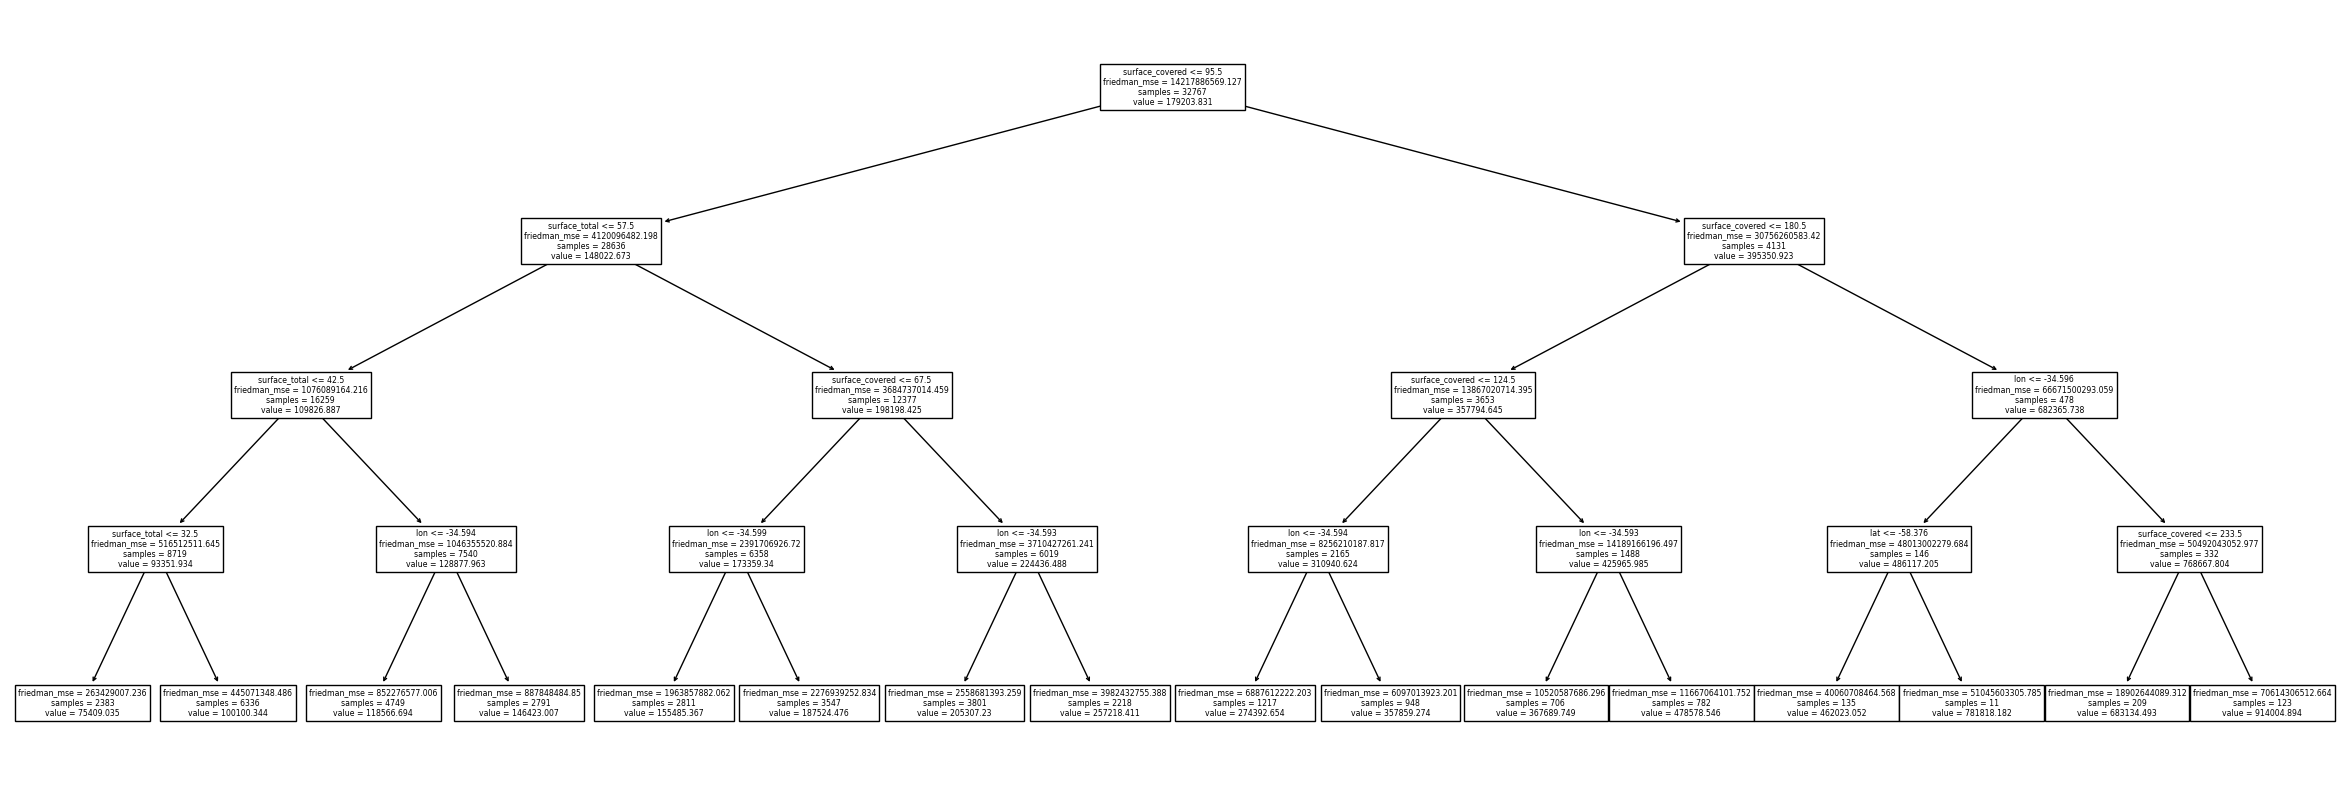

In [ ]:
sk.tree.plot_tree(reg, feature_names=X_train.columns);

## 3. Archivo para entrega (en Kaggle)

In [ ]:
df_ap = pd.read_csv("a_predecir.csv", index_col="id")
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
291,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.423990,-34.589190,Argentina,Capital Federal,Palermo,NaN,...,1.0,42.0,42.0,NaN,USD,NaN,Departamento de 2 ambientes en Venta en Palermo,"Excelente departamento de dos ambientes, segun...",Departamento,Venta
638,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.396664,-34.592536,Argentina,Capital Federal,Recoleta,NaN,...,2.0,167.0,161.0,NaN,USD,NaN,Venta - Junin 1300,Semipiso. Living. Comedor. 3 dormitorio(s). 2 ...,Departamento,Venta
1245,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.414015,-34.604186,Argentina,Capital Federal,Almagro,NaN,...,1.0,43.0,39.0,NaN,USD,NaN,Departamento de 1 ambiente en Venta en Almagro,"1 ambiente al frente con balcon!, 42 m2 totale...",Departamento,Venta
1267,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,Balvanera,NaN,...,1.0,39.0,36.0,NaN,USD,NaN,Moreno 2900,Viva en un monoambiente con amenities de una t...,Departamento,Venta
1272,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,Balvanera,NaN,...,1.0,30.0,28.0,NaN,USD,NaN,Moreno 2900,Trabaje en un monoambiente con amenities de un...,Departamento,Venta


# Manejo de valores atipicos con medidas descriptivas

In [ ]:
df_ap.loc[df_ap["rooms"]>4, 'rooms'] = df_ap["rooms"].median()

In [ ]:
df_ap.loc[df_ap["bathrooms"]>3, 'bathrooms'] = df_ap["bathrooms"].median()

In [ ]:
df_ap.loc[df_ap["bedrooms"]>3, 'bedrooms'] = df_ap["bedrooms"].median()

In [ ]:
df_ap.loc[df_ap["surface_total"]>110, 'surface_total'] = df_ap["surface_total"].median()

# Imputar valores faltantes con medidas descriptivas

In [ ]:
#Valores faltantes de las columnas con variables numericas: surfaced_ covered, bathrooms, bedrooms

df_ap['bathrooms'].fillna(df_ap['bathrooms'].median(), inplace=True)
print("valores perdidos en bathroom: " +
      str(df_ap['bathrooms'].isnull().sum()))

valores perdidos en bathroom: 0


In [ ]:
df_ap['surface_covered'].fillna(df_ap['surface_covered'].median(), inplace=True)
print("valores perdidos en surface_covered: " +
      str(df_ap['surface_covered'].isnull().sum()))


valores perdidos en surface_covered: 0


In [ ]:
df_ap['bedrooms'].fillna(df_ap['bedrooms'].median(), inplace=True)
print("valores perdidos en bedrooms: " +
      str(df_ap['bedrooms'].isnull().sum()))

valores perdidos en bedrooms: 0


In [ ]:
df_ap = df_ap.drop(columns=['l5'])
df_ap = df_ap.drop(columns=['l6'])
df_ap = df_ap.drop(columns=['price_period'])

In [ ]:
# me quedo con los campos numéricos
df_ap = df_ap.select_dtypes(exclude=["object"])

In [ ]:
# mismas limpiezas de antes
df_ap.fillna(0, inplace=True)

df_ap.isna().sum()

lat                0
lon                0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [ ]:
X = df[df.columns.drop("price")]
y = df["price"]

# Entrenamos el modelo anterior con el 100% de los datos de entrenamiento
reg.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, random_state=42)

In [ ]:
# Usamos las mismas columnas que en df
X_ap = df_ap[df.columns.drop("price")]

# Predecimos los precios de a_predecir.csv
df_ap["price"] = reg.predict(X_ap)

df_ap

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
id,,,,,,,,
291,-58.423990,-34.589190,2.0,1.0,1.0,42.0,42.0,100154.100188
638,-58.396664,-34.592536,4.0,3.0,2.0,58.0,161.0,479451.971116
1245,-58.414015,-34.604186,1.0,2.0,1.0,43.0,39.0,118399.342176
1267,-58.453318,-34.650948,1.0,2.0,1.0,39.0,36.0,100154.100188
1272,-58.453318,-34.650948,1.0,2.0,1.0,30.0,28.0,75363.772515
...,...,...,...,...,...,...,...,...
971688,0.000000,0.000000,3.0,2.0,3.0,72.0,64.0,206056.107390
332040,-58.459588,-34.547869,3.0,2.0,1.0,50.0,50.0,146431.681225
960094,-58.371200,-34.635302,2.0,1.0,1.0,48.0,41.0,118399.342176


In [ ]:
# Grabamos la solución para ser subida en kaggle
df_ap["price"].to_csv("solucion.csv", index=True)